## **Policy evaluation and improvement algorithm for a Markov Decision Process (MDP)**

MDP with policy evaluation and improvement, we aim to find an optimal policy that maximizes the cumulative reward for an agent over time. The process involves iteratively evaluating and improving the policy by calculating the value function and updating the policy based on it. This approach is widely applicable to decision-making problems in various fields like game theory, robotics, finance, and healthcare. The combination of policy evaluation and policy improvement ensures that the agent learns and adapts to make the best possible decisions over time.

In [15]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#MDP cmponents
st = [0, 1, 2, 3]  # 4 states
act = [0, 1, 2]
g = 0.9          # discount factor

# Transition probabilities
P = {
    0: {0: [(0.8, 0), (0.2, 1)], 1: [(0.5, 1), (0.5, 2)], 2: [(0.6, 0), (0.4, 3)]},
    1: {0: [(0.7, 0), (0.3, 2)], 1: [(0.9, 2), (0.1, 0)], 2: [(0.4, 1), (0.6, 3)]},
    2: {0: [(1.0, 2)], 1: [(1.0, 2)], 2: [(0.3, 1), (0.7, 3)]},
    3: {0: [(0.5, 0), (0.5, 1)], 1: [(0.2, 2), (0.8, 3)], 2: [(1.0, 3)]}
}

# Rewards
R = {
    0: {0: 5, 1: 1, 2: 2},
    1: {0: 2, 1: 0, 2: 3},
    2: {0: 0, 1: 10, 2: 1},
    3: {0: 1, 1: 2, 2: 0}
}

#policy and value function
policy = {s: 0 for s in st}  #initial policy as ranndom
val = {s: 0 for s in st}  #value function initialized to 0

In [11]:
#Policy Evaluation
def eval_p(policy, P, R, gamma, theta=0.01):
    val_new = val.copy()
    while True:
        delta = 0
        for s in st:
            v = 0
            a = policy[s]
            for prob, next_state in P[s][a]:
                v += prob * (R[s][a] + gamma * val_new[next_state])
            delta = max(delta, abs(val_new[s] - v))
            val_new[s] = v
        if delta < theta:
            break
    return val_new

In [12]:
#policy improvement
def improv(P, R, val, gamma):
    new_p = {}
    for s in st:
        best_action = None
        best_value = float('-inf')
        for a in act:
            value = 0
            for prob, next_state in P[s][a]:
                value += prob * (R[s][a] + gamma * val[next_state])
            if value > best_value:
                best_value = value
                best_action = a
        new_p[s] = best_action
    return new_p

In [13]:
#policy iteration- combining evaluation and improvement
def comb_p(P, R, gamma):
    policy = {s: 0 for s in st}  # starting with random policy
    while True:
        V = eval_p(policy, P, R, gamma)
        new_policy = improv(P, R, V, gamma)

        #if the policy does not change, then exit-break
        if new_policy == policy:
            break
        policy = new_policy
    return policy, V

In [14]:
o_pol, o_val = comb_p(P, R, g)

print("Optimal Policy:", o_pol)
print("Optimal Value Function:", o_val)

Optimal Policy: {0: 1, 1: 1, 2: 1, 3: 0}
Optimal Value Function: {0: 85.844671521326, 1: 88.64866503590481, 2: 99.9140495544283, 3: 79.52200145075386}


- The policy suggests that, for states 0, 1, and 2, action 1 is the best choice, while in state 3, action 0 is the optimal choice.

- The fact that action 1 is consistently chosen for states 0, 1, and 2 suggests that action 1 might yield higher expected rewards in these states compared to other actions. It could also mean that the transitions from these states to the next states (or their expected rewards) are more favorable with action 1.

- The highest value function is at state 2 (99.91), indicating that state 2 is the most favorable state in terms of long-term rewards. The optimal policy likely guides the agent towards state 2, suggesting it has the most beneficial rewards or transitions in the future.



In [19]:
def gamma_effect(P, R, gamma_values):
    value_functions = {}
    policies = {}

    for gamma in gamma_values:
        policy, V = comb_p(P, R, gamma)
        value_functions[gamma] = V
        policies[gamma] = policy

    # Plot Value Function vs Discount Factor
    plt.figure(figsize=(8, 6))
    for gamma in gamma_values:
        V = value_functions[gamma]
        plt.plot(st, [V[s] for s in st], label=f'gamma={gamma}')
    plt.title('Effect of Discount Factor on Value Function')
    plt.xlabel('States')
    plt.ylabel('Value Function V(s)')
    plt.legend()
    plt.show()

    # Plot Policies for each gamma
    plt.figure(figsize=(8, 6))
    for gamma in gamma_values:
        policy = policies[gamma]
        plt.plot(st, [policy[s] for s in st], label=f'gamma={gamma}')
    plt.title('Effect of Discount Factor on Policy')
    plt.xlabel('States')
    plt.ylabel('Action')
    plt.legend()
    plt.show()

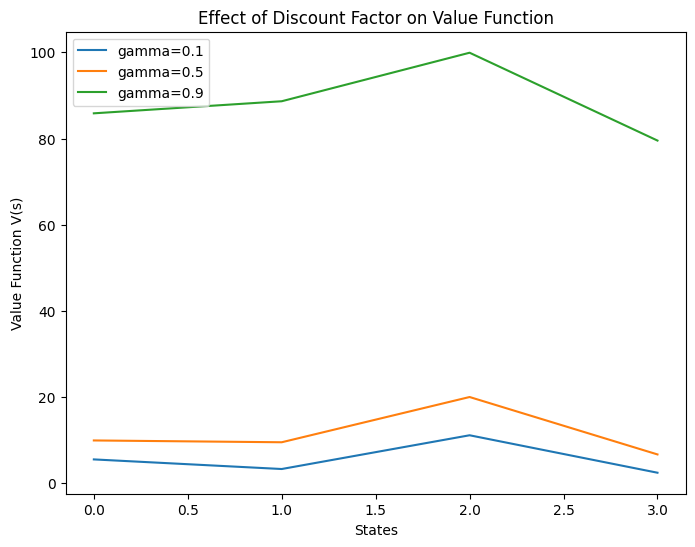

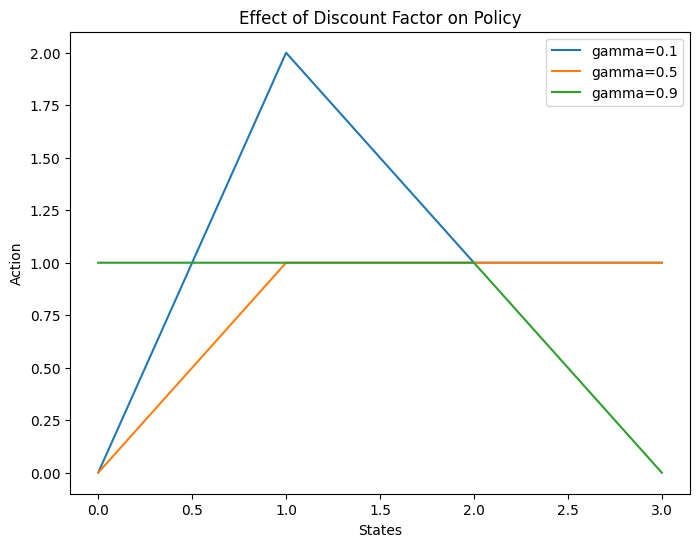

In [20]:
gamma_values = [0.1, 0.5, 0.9]
gamma_effect(P, R, gamma_values)

### **Conclusion**


1. The policy reflects the optimal action to take in each state, and it reveals the strategy that maximizes the cumulative reward over time. The value function gives us insight into the desirability of each state.
2. States with higher values are more "desirable" in terms of long-term rewards, and we can see that the agent is likely encouraged to transition to state 2, as it offers the highest reward.